In [1]:
#Importing our Packages
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as rmse
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder

In [2]:
#Load Libraries and Create engine Connection

import pymysql
import pandas as pd
import numpy as np
import sqlalchemy
import gc
engine =sqlalchemy.create_engine(
        sqlalchemy.engine.url.URL.create(
        drivername="mysql+pymysql",
        username='Estimators',  # e.g. "my-database-user"
        password='Estimator2021',  # e.g. "my-database-password"
        host='34.77.88.127',  # e.g. "127.0.0.1"
        port=3306,  # e.g. 3306
        database='Housing_France',  # e.g. "my-database-name"
    ))

conn = engine.connect().execution_options(stream_results=True)

In [3]:
#Load Libraries and Create engine Connection

import pymysql
import pandas as pd
import numpy as np
import sqlalchemy
import gc

def get_data(querystring,chunk):
    engine =sqlalchemy.create_engine(
    sqlalchemy.engine.url.URL.create(
    drivername="mysql+pymysql",
    username='Estimators',  # e.g. "my-database-user"
    password='Estimator2021',  # e.g. "my-database-password"
    host='34.77.88.127',  # e.g. "127.0.0.1"
    port=3306,  # e.g. 3306
    database='Housing_France',  # e.g. "my-database-name"
    ))
    conn = engine.connect().execution_options(stream_results=True)
    frame = pd.DataFrame()
    for chunk_dataframe in pd.read_sql(
            querystring, conn, chunksize=chunk):
            print(f"Got dataframe w/{len(chunk_dataframe)} rows")
            frame= frame.append(chunk_dataframe)
            # ... do something with dataframe ...
            
    return frame

In [4]:
#Template for getting some data
df = get_data("""select * from data_working_update LIMIT 50000""", 1000)

Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got datafram

In [5]:
data = df.copy()
data.columns

Index(['id_mutation', 'date_mutation', 'nature_mutation', 'valeur_fonciere',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'id_parcelle', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain',
       'longitude', 'latitude'],
      dtype='object')

In [6]:
data.shape

(50000, 17)

In [7]:
data[data['id_mutation'] == '2016-62756']

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
998,2016-62756,2016-07-21,Vente,547000,CHE DES ECOLIERS,0417,6140,6157,Vence,6,06157000BI0080,Maison,108,5,731,7.125507,43.727813
999,2016-62756,2016-07-21,Vente,547000,CHE DES ECOLIERS,0417,6140,6157,Vence,6,06157000BI0080,Maison,108,5,502,7.125507,43.727813


# Drop duplicates

## id_mutation

In [8]:
def drop_duplicates(df, col_name):
    return df.drop_duplicates(subset=[col_name])

data = drop_duplicates(df=data, col_name = 'id_mutation')
data.shape

(40717, 17)

In [9]:
df2 = data.copy()

In [10]:
max(df2['valeur_fonciere']), min(df2['valeur_fonciere'])

(5000000, 5000)

# Visualization

## Plotting out 'nombre_pieces_principales', 'valeur_fonciere' 

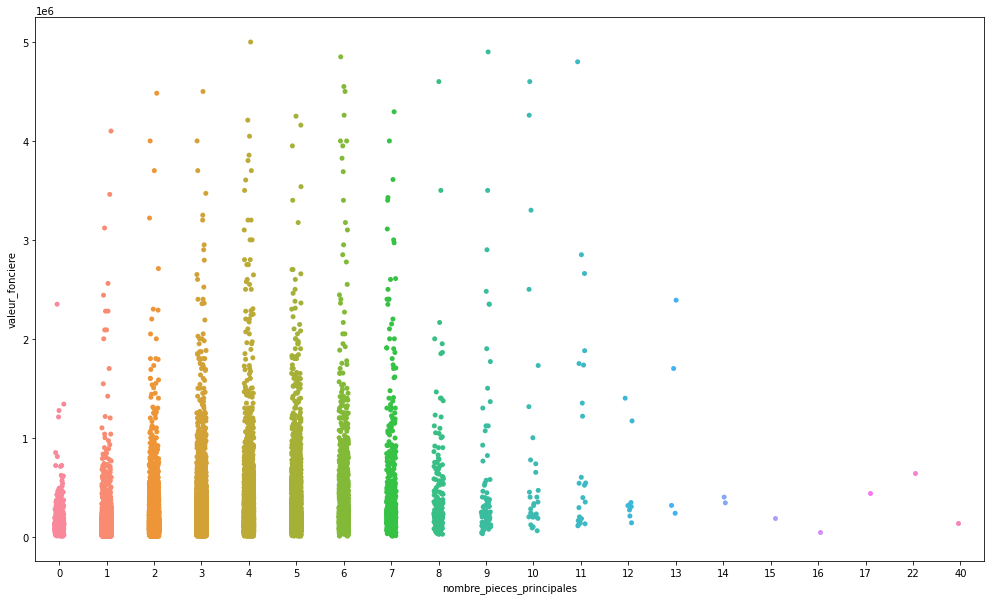

In [11]:
plt.figure(figsize=(17, 10)) 

sns.stripplot(x='nombre_pieces_principales', y='valeur_fonciere',data=df2, size=5);

## Plotting out 'surface_reelle_bati', 'valeur_fonciere' 

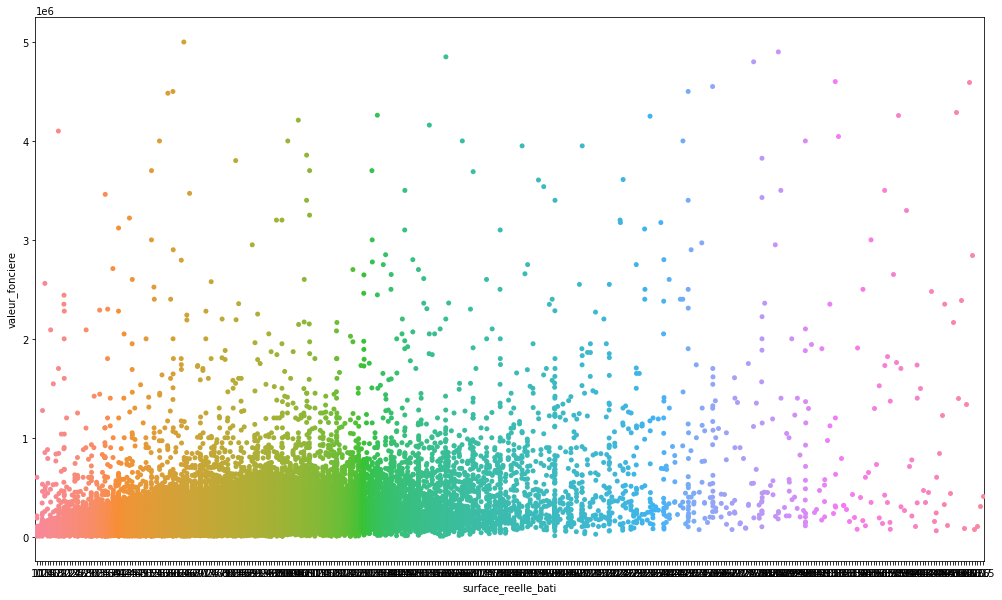

In [12]:
plt.figure(figsize=(17, 10)) 

sns.stripplot(x='surface_reelle_bati', y='valeur_fonciere',data=df2, size=5);

# Filter data, Removing outliers

In [13]:
df2=df2[
    (df2['valeur_fonciere'] < 1_000_000) & (df2['valeur_fonciere'] > 10_000)]
df2.shape

(39889, 17)

In [14]:
df2=df2[
    (df2['nombre_pieces_principales'] < 8) & (df2['nombre_pieces_principales'] > 0)]
df2.shape

(39163, 17)

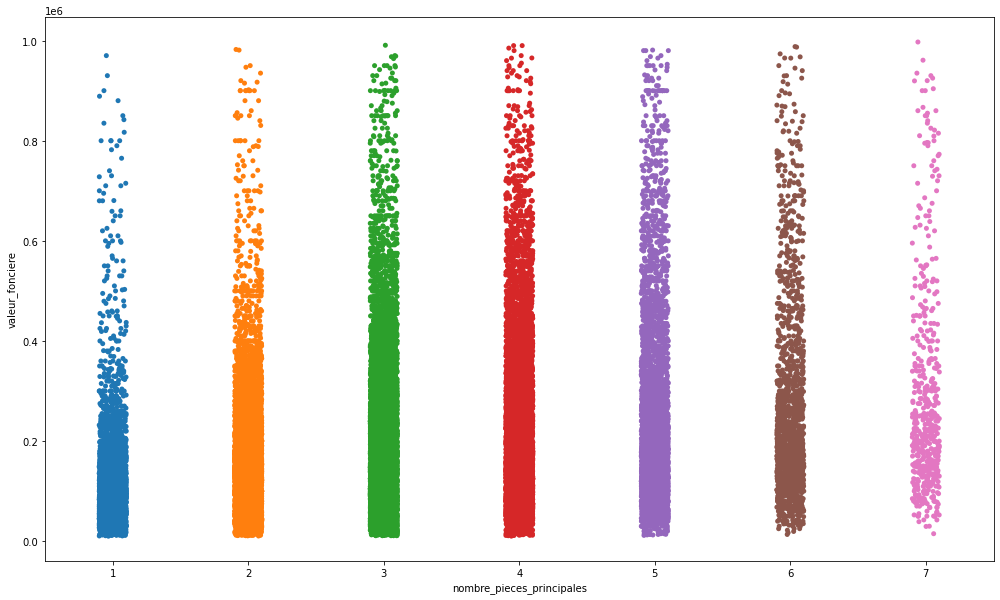

In [15]:
plt.figure(figsize=(17, 10)) 

sns.stripplot(x='nombre_pieces_principales', y='valeur_fonciere',data=df2, size=5);

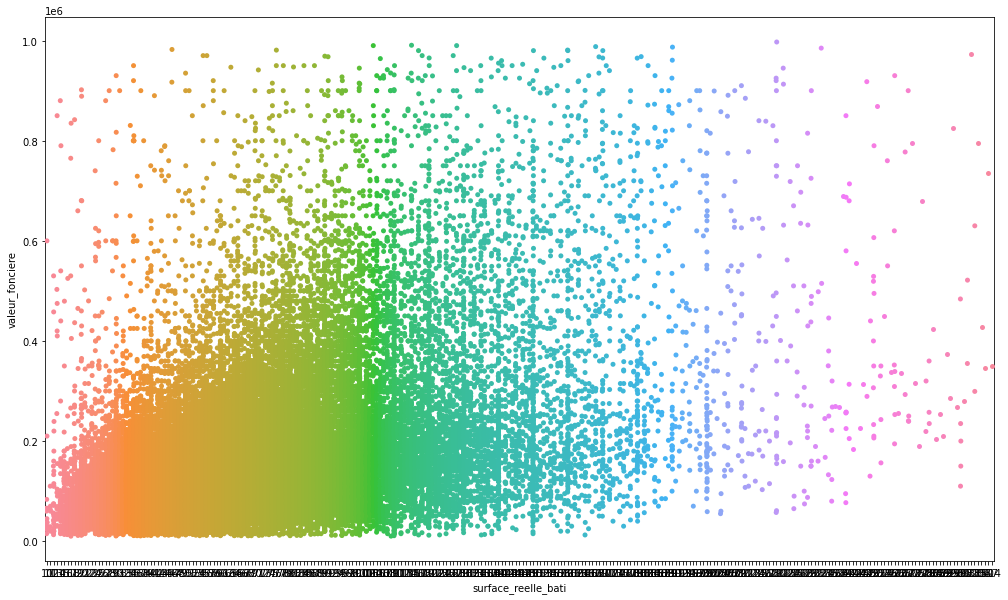

In [16]:
plt.figure(figsize=(17, 10)) 

sns.stripplot(x='surface_reelle_bati', y='valeur_fonciere',data=df2, size=5);

## Scatterplots

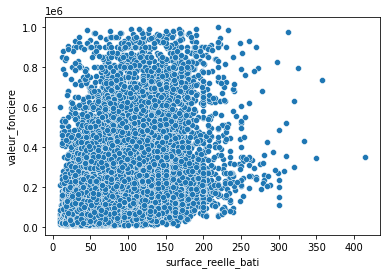

In [17]:
sns.scatterplot(x=df2['surface_reelle_bati'], y=df2['valeur_fonciere']);

In [18]:
df2=df2[
    (df2['surface_reelle_bati'] < 220) & (df2['valeur_fonciere'] > 10)]
df2.shape

(38990, 17)

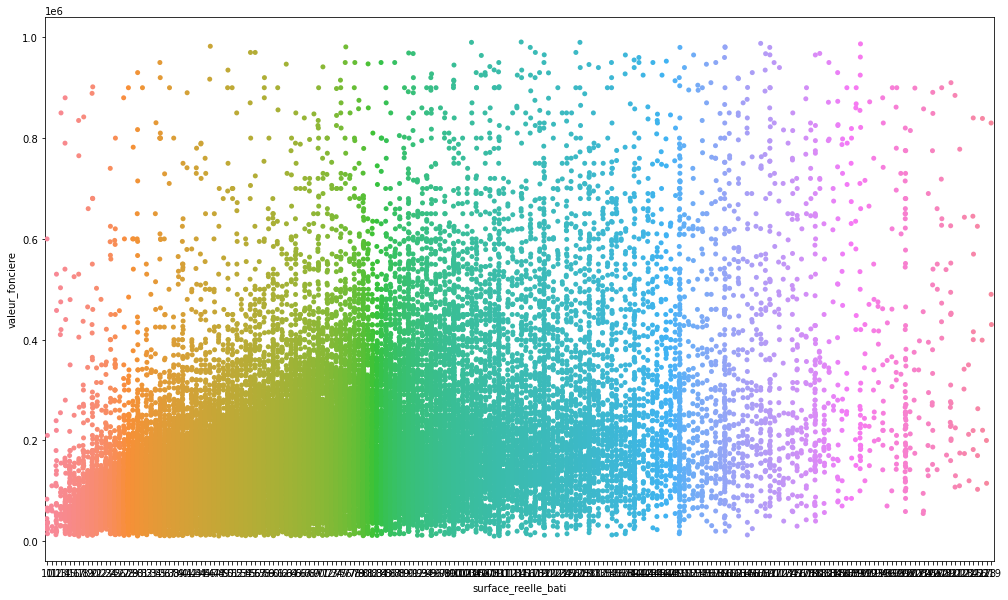

In [19]:
plt.figure(figsize=(17, 10)) 

sns.stripplot(x='surface_reelle_bati', y='valeur_fonciere',data=df2, size=5);

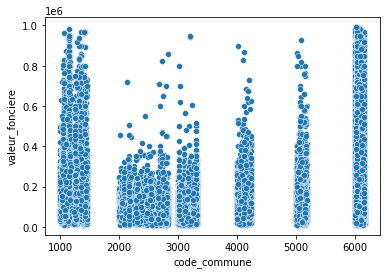

In [20]:
sns.scatterplot(x=df2['code_commune'], y=df2['valeur_fonciere']);

In [21]:
df2=df2[
    (df2['code_commune'] < 3_000) & (df2['code_commune'] > 2_000)]
df2.shape

(5081, 17)

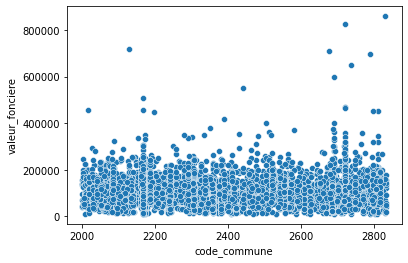

In [22]:
sns.scatterplot(x=df2['code_commune'], y=df2['valeur_fonciere']);

In [23]:
df2=df2[
    (df2['valeur_fonciere'] < 250_000)]
df2.shape

(4974, 17)

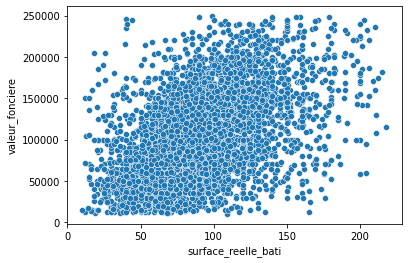

In [24]:
sns.scatterplot(x=df2['surface_reelle_bati'], y=df2['valeur_fonciere']);

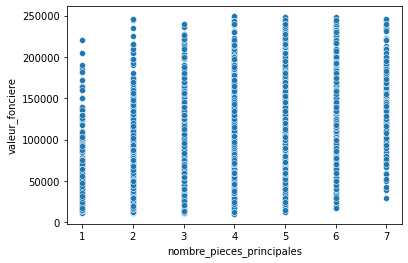

In [25]:
sns.scatterplot(x=df2['nombre_pieces_principales'], y=df2['valeur_fonciere']);

In [26]:
df2 = df2.drop(columns = 'nature_mutation')
df2.shape

(4974, 16)

In [27]:
df2.head()

,id_mutation,date_mutation,valeur_fonciere,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
735,2016-12813,2016-01-05,91500,PL DU BROUAGE,0200,2300,2173,Chauny,2,02173000AK0183,Appartement,50,2,322,3.214219,49.614380
740,2016-12814,2016-01-05,186700,RUE DE LA RETOURNE,0054,2190,2541,Neufchâtel-sur-Aisne,2,025410000B0340,Maison,96,4,692,4.033845,49.431173
741,2016-12815,2016-01-11,49000,RUE DE LA FERE,0060,2800,2165,Charmes,2,02165000AE0308,Maison,65,4,130,3.381041,49.658618
742,2016-12816,2016-01-11,25000,AV DU GENERAL LECLERC,0225,2800,2304,La Fère,2,02304000AH0258,Maison,62,3,41,3.376870,49.659718
749,2016-12822,2016-01-11,134470,RUE SAINT HONORE,0162,2820,2676,Saint-Erme-Outre-et-Ramecourt,2,02676000AD0527,Maison,137,5,552,3.850827,49.521076


In [28]:
df2.isnull().sum()

id_mutation                  0
date_mutation                0
valeur_fonciere              0
adresse_nom_voie             0
adresse_code_voie            0
code_postal                  0
code_commune                 0
nom_commune                  0
code_departement             0
id_parcelle                  0
type_local                   0
surface_reelle_bati          0
nombre_pieces_principales    0
surface_terrain              0
longitude                    0
latitude                     0
dtype: int64

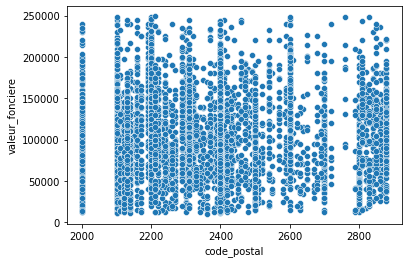

In [29]:
sns.scatterplot(x=df2['code_postal'], y=df2['valeur_fonciere']);

In [30]:
len(df2['code_postal'].unique())

69

In [31]:
len(df2['code_commune'].unique())

672

In [34]:
#Change code_postal to str df2['code_postal'].dtype
df2['code_postal'] = df2['code_postal'].astype(str)

# Function encoding_categ_column

In [35]:
def encoding_categ_column(df, col_name):
    
    L = list(df[col_name].unique())
    if '' in L:
        df[col_name].replace("", "NoValue", inplace=True) #Replace NaN by "NoCodeNature"
    
    ohe = OneHotEncoder(sparse = False) # Instanciate encoder
    ohe.fit(df[[col_name]]) # Fit encoder  ---> OneHotEncoder(sparse=False)
    
    col_encoded = ohe.transform(df[[col_name]]) # Encode

    dicts_col = {}
    keys = list(ohe.categories_[0])
    values = col_encoded.T.astype(int)
    
    for i,j in enumerate(keys):
        dicts_col[j] = values[i,:]

    result = pd.DataFrame.from_dict(dicts_col)
    
    df = df.reset_index(drop=True)
    
    #Concat df and result dataframes
    data_res = pd.concat([df, result], axis = 1)
    
    if 'NoValue' in list(data_res.columns):
        data_res = data_res.drop(columns= ['NoValue',col_name] )
    else:
        data_res = data_res.drop(columns= col_name)
        
    return data_res   

## code_postal

In [36]:
data_t = encoding_categ_column(df = df2, col_name = 'code_postal')
data_t.shape

(4974, 84)

In [37]:
L1 = len(df2['code_postal'].unique()) + df2.shape[1] - 1
L2 = data_t.shape[1]
assert(L1 == L2)

In [38]:
data_t2 = data_t# I add this line because this column does not exist in the updated DB 

## type_local 

In [39]:
df2.columns #['type_local'].unique()

Index(['id_mutation', 'date_mutation', 'valeur_fonciere', 'adresse_nom_voie',
       'adresse_code_voie', 'code_postal', 'code_commune', 'nom_commune',
       'code_departement', 'id_parcelle', 'type_local', 'surface_reelle_bati',
       'nombre_pieces_principales', 'surface_terrain', 'longitude',
       'latitude'],
      dtype='object')

In [40]:
data_t3 = encoding_categ_column(df = data_t2, col_name = 'type_local')
data_t3.shape

(4974, 85)

In [41]:
L1 = len(data_t2['type_local'].unique()) + data_t2.shape[1] - 1
L2 = data_t3.shape[1]
assert(L1 == L2)

**code_nature_culture_speciale**

In [42]:
data_t4 = data_t3

# Function : convert_date

In [43]:
def convert_date(string, separator):
    a = string.split(separator)
    year = a[0]
    month = a[1]
    day = a[2]
    return year, month, day

Year, Month, Day = convert_date(string = '2020-01-09', separator = '-')

In [44]:
Year

'2020'

In [45]:
Month

'01'

In [46]:
Day

'09'

In [47]:
data_t4.head(4)

,id_mutation,date_mutation,valeur_fonciere,adresse_nom_voie,adresse_code_voie,code_commune,nom_commune,code_departement,id_parcelle,surface_reelle_bati,...,2810,2820,2830,2840,2850,2860,2870,2880,Appartement,Maison
0,2016-12813,2016-01-05,91500,PL DU BROUAGE,0200,2173,Chauny,2,02173000AK0183,50,...,0,0,0,0,0,0,0,0,1,0
1,2016-12814,2016-01-05,186700,RUE DE LA RETOURNE,0054,2541,Neufchâtel-sur-Aisne,2,025410000B0340,96,...,0,0,0,0,0,0,0,0,0,1
2,2016-12815,2016-01-11,49000,RUE DE LA FERE,0060,2165,Charmes,2,02165000AE0308,65,...,0,0,0,0,0,0,0,0,0,1
3,2016-12816,2016-01-11,25000,AV DU GENERAL LECLERC,0225,2304,La Fère,2,02304000AH0258,62,...,0,0,0,0,0,0,0,0,0,1


# Starting analysis

In [128]:
df_new = data_t4.copy()

# Feature importance (all features)

In [129]:
len(list(df_new.columns))

85

In [130]:
df_new.columns[:10]

Index(['id_mutation', 'date_mutation', 'valeur_fonciere', 'adresse_nom_voie',
       'adresse_code_voie', 'code_commune', 'nom_commune', 'code_departement',
       'id_parcelle', 'surface_reelle_bati'],
      dtype='object')

In [131]:
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle',
 ]

for i in columns_todrop:
    cols.remove(i)
 

In [132]:
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

In [133]:
len(cols_removd_target), len(cols)

(76, 77)

In [134]:
data_v2 = df_new[cols]

In [135]:
y = data_v2['valeur_fonciere']

In [136]:
X = data_v2[cols_removd_target]

In [137]:
X.shape

(4974, 76)

In [138]:
y.shape

(4974,)

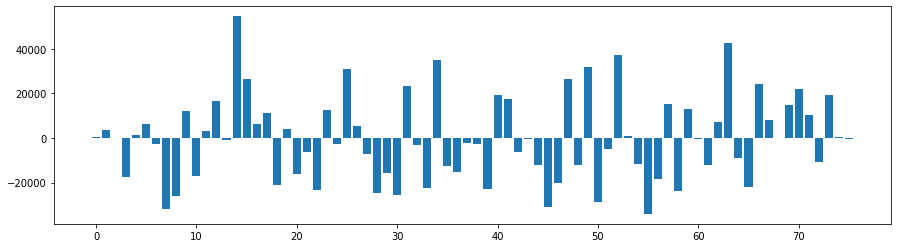

In [139]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset

#X = data[mask_columns]
#y = data['valeur_fonciere'] # define the model

model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
#for i,v in enumerate(importance):
 #   print(cols_target[i], 'Feature: %0d, Score: %.5f' % (i,v))

fig, ax = plt.subplots(figsize = (15,4))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [140]:
len(importance.tolist())

76

In [141]:
#display the sorted importance-features 

J = importance.tolist()
K = []
F = []

print("len(J) : ", len(J))
for i in J:
    K.append(np.abs(i))
      
ind  =  sorted(range(len(K)), reverse=True, key=lambda c: K[c])
K.sort(reverse= True)
print("len(K) : ", len(K), "len(ind) : ", len(ind))


for i in ind:
    F.append(cols_removd_target[i])
#np.asarray(F) # list of important features, by decreasing order
print(len(F))

len(J) :  76
len(K) :  76 len(ind) :  76
76


In [142]:
np.argmax(K), max(K), np.argmin(K), min(K) # check the lists : ind, K, F and J

(0, 54699.69968389443, 75, 7.162924432755062)

In [143]:
ind[0], ind[-1], K[0], K[-1], F[0], F[-1] # check the lists : ind, K, F and J

(14, 2, 54699.69968389443, 7.162924432755062, '2190', 'surface_terrain')

In [144]:
cols_removd_target[ind[0]], cols_removd_target[ind[-1]] # check the lists : ind, K, F and J

('2190', 'surface_terrain')

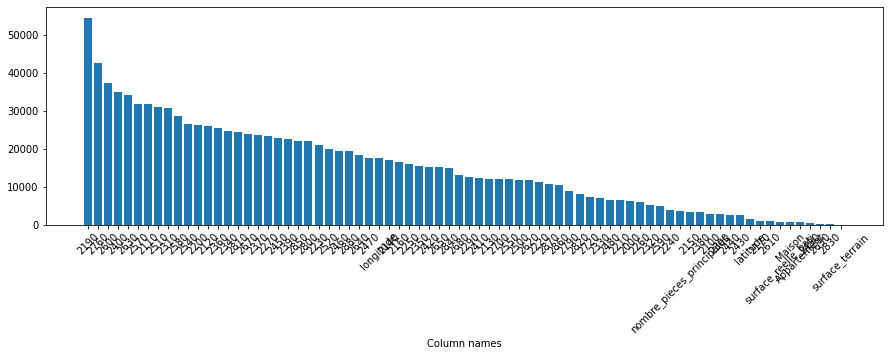

In [145]:
fig, ax = plt.subplots(figsize = (15,4))
# plot feature importance
pyplot.bar([x for x in range(len(K))], K)
pyplot.xlabel("Column names")
pyplot.xticks(range(len(ind)), F,
  rotation = 45)
pyplot.show()

In [146]:
res = K / max(K)
#res

In [148]:
dicts_K = {'columns': F, 'coef_(%)': res}
   
result = pd.DataFrame.from_dict(dicts_K)

result

,columns,coef_(%)
0,2190,1.000000
1,2760,0.779282
2,2600,0.682575
3,2400,0.642697
4,2630,0.623649
...,...,...
71,Appartement,0.010663
72,2490,0.008006
73,2690,0.004456
74,2830,0.001554


In [149]:
R = result['columns'][-5:]
columns_todrop = list(R)
columns_todrop

['Appartement', '2490', '2690', '2830', 'surface_terrain']

# Multi-colinearity  

In [150]:
#pip install statsmodels

In [151]:
X.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [152]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [153]:
X.shape

(4974, 76)

In [154]:
X.iloc[:,:-1].shape

(4974, 75)

In [155]:
#X = X.iloc[:,:-1]
C = calc_vif(X.iloc[:,:])
C

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,surface_reelle_bati,2.212159
1,nombre_pieces_principales,2.265572
2,surface_terrain,1.106040
3,longitude,83.382176
4,latitude,48.762008
...,...,...
71,2860,inf
72,2870,inf
73,2880,inf
74,Appartement,inf


In [156]:
columns_todrop

['Appartement', '2490', '2690', '2830', 'surface_terrain']

In [157]:
#sort dataframe
sorted_VIF = C.sort_values(by='VIF', ascending= False)
sorted_VIF

,Features,VIF
38,2440,inf
57,2650,inf
55,2630,inf
54,2620,inf
53,2610,inf
...,...,...
3,longitude,83.382176
4,latitude,48.762008
1,nombre_pieces_principales,2.265572
0,surface_reelle_bati,2.212159


**For info :** 
* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [158]:
#instantiating train test split while creating my X and y train and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


baseline_model = DummyRegressor(strategy="mean") # Baseline
baseline_model.fit(X_train, y_train) # Calculate value for stratgy
baseline_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

-0.0007174550231070498

In [159]:
model = LinearRegression().fit(X_train, y_train) # instantiate and fit model 

model.score(X_test, y_test) # Score model

0.32808606856130595

In [160]:
from sklearn.preprocessing import StandardScaler

#instantiating the standard scaler and setting it equal to ss
#scaling my Xs
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [161]:
baseline_model.fit(X_train_sc, y_train) # Calculate value for stratgy
baseline_model.score(X_test_sc, y_test) # Score model based on consistently predicting the strategy

-0.0007174550231070498

In [162]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as rmse

la= Lasso()
ri = Ridge()
lr = LinearRegression()
models = [la,ri,lr]
for model in models:
    fitter = model.fit(X_train_sc,y_train)
    print(f"{model} R2 score is: {np.round(model.score(X_test_sc, y_test),3)})")
    print(f"{model} rmse score is: {np.round(rmse(model.predict(X_test_sc),y_test),3)})")
    print(f"{model} mape score is: {np.round(mape(model.predict(X_test_sc),y_test),3)}"  )

Lasso() R2 score is: 0.328)
Lasso() rmse score is: 1800745124.732)
Lasso() mape score is: 0.42
Ridge() R2 score is: 0.328)
Ridge() rmse score is: 1800708227.037)
Ridge() mape score is: 0.417
LinearRegression() R2 score is: 0.328)
LinearRegression() rmse score is: 1800739959.312)
LinearRegression() mape score is: 0.429


/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289142763596.8086, tolerance: 917921576.289149
  model = cd_fast.enet_coordinate_descent(


# Function feature_selection

In [168]:
def feature_selection(df, col_list, target_var , model): #df : dataframe & col_list : list of columns to evaluate their importance
    
    #by default, col_list = cols_removd_target
    #target_var = 'valeur_fonciere'
        
    # define dataset
    y = df[target_var]
    X = df[col_list]

    # define model
    if model == "LinearRegression":
        model = LinearRegression()
        # fit the model
        model.fit(X, y)
        # get importance
        importance = model.coef_
        # summarize feature importance
        #for i,v in enumerate(importance):
            #print(cols[i], 'Feature: %0d, Score: %.5f' % (i,v))

        fig, ax = plt.subplots(figsize = (15,4))
        # plot feature importance
        pyplot.bar([x for x in range(len(importance))], importance)
        pyplot.show()

        #display the sorted importance-features 

        J = importance.tolist()
        K = []
        F = []
        
        for i in J:
            K.append(np.abs(i))

        ind  =  sorted(range(len(K)), reverse=True, key=lambda c: K[c])
        K.sort(reverse= True)
        
        for i in ind:
            F.append(col_list[i])
  
        fig, ax = plt.subplots(figsize = (15,4))
        # plot feature importance
        pyplot.bar([x for x in range(len(K))], K)
        pyplot.xlabel("Column names")
        pyplot.xticks(range(len(ind)), F,
          rotation = 45)
        pyplot.show()
            
        res = K / max(K)

        dicts_K = {'columns': F, 'coef_(%)': res}
        result = pd.DataFrame.from_dict(dicts_K, )

        R = result['columns'][-5:]
        columns_todrop = list(R)        
        
        # Calculating VIF
        vif = pd.DataFrame()
        vif["columns"] = X.columns
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        #C = calc_vif(X.iloc[:,:])
        C = calc_vif(X)
        #sort dataframe
        sorted_VIF = C.sort_values(by='VIF', ascending= False)


    return result, sorted_VIF, columns_todrop 


In [169]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle'
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]


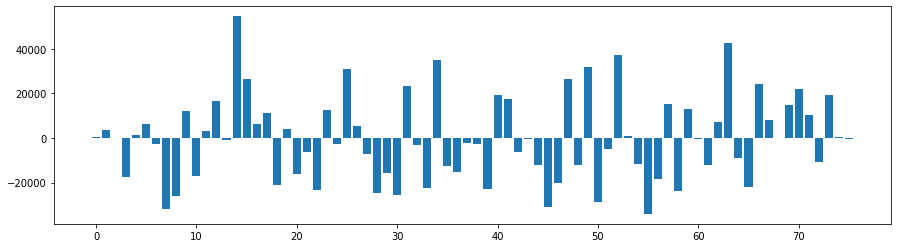

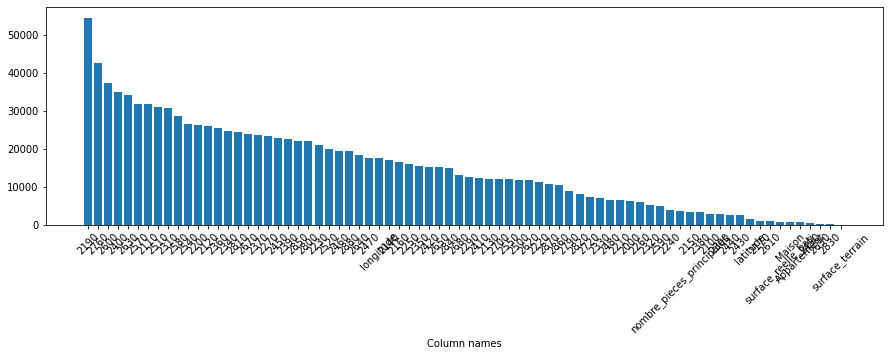

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [170]:
result, sorted_VIF, columns_todrop = feature_selection(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = "LinearRegression")

In [171]:
result

,columns,coef_(%)
0,2190,1.000000
1,2760,0.779282
2,2600,0.682575
3,2400,0.642697
4,2630,0.623649
...,...,...
71,Appartement,0.010663
72,2490,0.008006
73,2690,0.004456
74,2830,0.001554


In [172]:
columns_todrop

['Appartement', '2490', '2690', '2830', 'surface_terrain']

In [173]:
sorted_VIF

,Features,VIF
38,2440,inf
57,2650,inf
55,2630,inf
54,2620,inf
53,2610,inf
...,...,...
3,longitude,83.382176
4,latitude,48.762008
1,nombre_pieces_principales,2.265572
0,surface_reelle_bati,2.212159


# Function apply_regression_model

In [174]:
def apply_regression_model(df, col_list, target_var ,model):
        
    #by default, col_list = cols_removd_target
    #target_var = 'valeur_fonciere'
        
    # define dataset
    y = df[target_var]
    X = df[col_list]
    
    
    #instantiating train test split while creating my X and y train and test variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    #instantiating the standard scaler and setting it equal to ss
    #scaling my Xs
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_sc = scaler.transform(X_train)
    X_test_sc = scaler.transform(X_test)

    for model in models:
        fitter = model.fit(X_train_sc,y_train)
        print(f"{model} R2 score is: {np.round(model.score(X_test_sc, y_test),3)})")
        print(f"{model} rmse score is: {np.round(rmse(model.predict(X_test_sc),y_test),3)})")
        print(f"{model} mape score is: {np.round(mape(model.predict(X_test_sc),y_test),3)}"  )
        print(11*"** **")
        
        
la= Lasso()
ri = Ridge()
lr = LinearRegression()
models = [la,ri,lr]
    
apply_regression_model(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = models)

Lasso() R2 score is: 0.328)
Lasso() rmse score is: 1800745124.732)
Lasso() mape score is: 0.42
** **** **** **** **** **** **** **** **** **** **** **
Ridge() R2 score is: 0.328)
Ridge() rmse score is: 1800708227.037)
Ridge() mape score is: 0.417
** **** **** **** **** **** **** **** **** **** **** **
LinearRegression() R2 score is: 0.328)
LinearRegression() rmse score is: 1800739959.312)
LinearRegression() mape score is: 0.429
** **** **** **** **** **** **** **** **** **** **** **


/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289142763596.8086, tolerance: 917921576.289149
  model = cd_fast.enet_coordinate_descent(


# New simulation "removing column code postal 2440

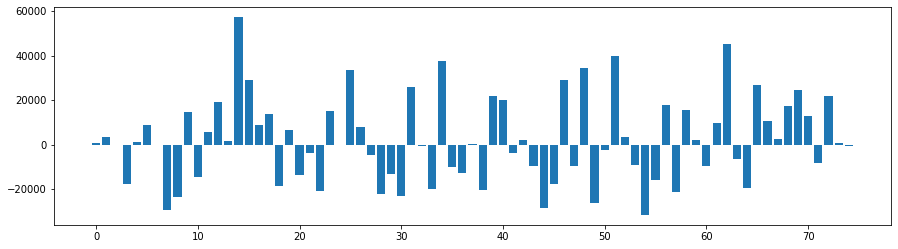

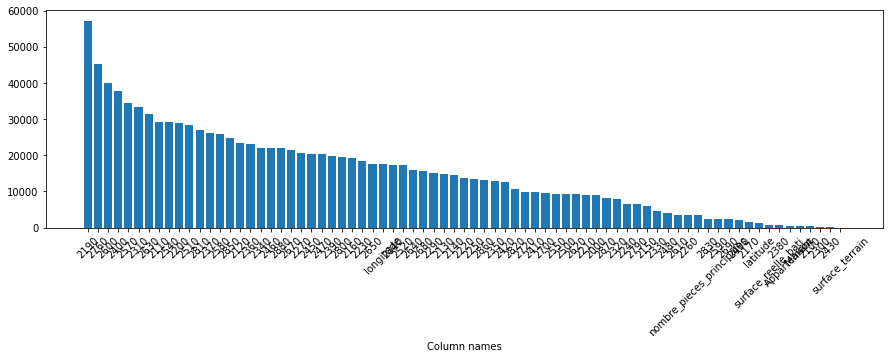

Lasso() R2 score is: 0.328)
Lasso() rmse score is: 1800702468.045)
Lasso() mape score is: 0.42
** **** **** **** **** **** **** **** **** **** **** **
Ridge() R2 score is: 0.328)
Ridge() rmse score is: 1800625442.672)
Ridge() mape score is: 0.417
** **** **** **** **** **** **** **** **** **** **** **
LinearRegression() R2 score is: 0.328)
LinearRegression() rmse score is: 1801319907.488)
LinearRegression() mape score is: 0.402
** **** **** **** **** **** **** **** **** **** **** **


In [176]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle', '2440'
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]

result, sorted_VIF, columns_todrop = feature_selection(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = "LinearRegression")

apply_regression_model(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = models)

In [177]:
result

,columns,coef_(%)
0,2190,1.000000
1,2760,0.789176
2,2600,0.696804
3,2400,0.658713
4,2570,0.603433
...,...,...
70,Maison,0.010185
71,2100,0.005642
72,2300,0.002935
73,2430,0.002109


In [178]:
columns_todrop

['Maison', '2100', '2300', '2430', 'surface_terrain']

In [179]:
sorted_VIF

,Features,VIF
74,Maison,335.481867
3,longitude,83.382176
4,latitude,48.762008
73,Appartement,42.328286
6,2100,23.395096
...,...,...
63,2790,1.417262
62,2760,1.375506
55,2640,1.337117
52,2610,1.256344


# New simulation "removing column code postal 2440 && 'Appartement'


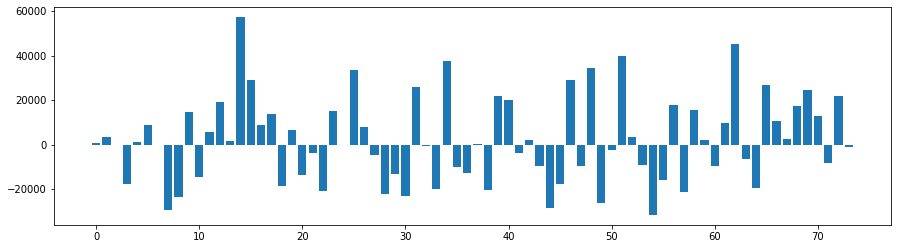

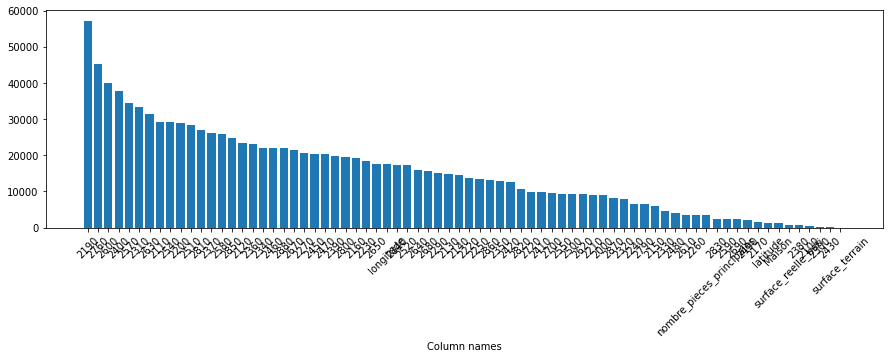

Lasso() R2 score is: 0.328)
Lasso() rmse score is: 1800702468.045)
Lasso() mape score is: 0.42
** **** **** **** **** **** **** **** **** **** **** **
Ridge() R2 score is: 0.328)
Ridge() rmse score is: 1800624271.572)
Ridge() mape score is: 0.417
** **** **** **** **** **** **** **** **** **** **** **
LinearRegression() R2 score is: 0.328)
LinearRegression() rmse score is: 1800840318.066)
LinearRegression() mape score is: 0.416
** **** **** **** **** **** **** **** **** **** **** **


In [180]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle', '2440', 'Appartement'
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]

result, sorted_VIF, columns_todrop = feature_selection(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = "LinearRegression")

apply_regression_model(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = models)

In [181]:
result

,columns,coef_(%)
0,2190,1.000000
1,2760,0.789176
2,2600,0.696804
3,2400,0.658713
4,2570,0.603433
...,...,...
69,2380,0.011325
70,2100,0.005642
71,2300,0.002935
72,2430,0.002109


In [182]:
columns_todrop

['2380', '2100', '2300', '2430', 'surface_terrain']

In [183]:
sorted_VIF

,Features,VIF
3,longitude,6270.838630
4,latitude,5949.023669
1,nombre_pieces_principales,21.513741
0,surface_reelle_bati,17.963528
43,2500,12.020748
...,...,...
57,2670,1.196868
62,2760,1.186083
55,2640,1.171580
61,2720,1.146517


# New simulation "removing columns:  code postal 2440 && 'Appartement' &&  'longitude' 


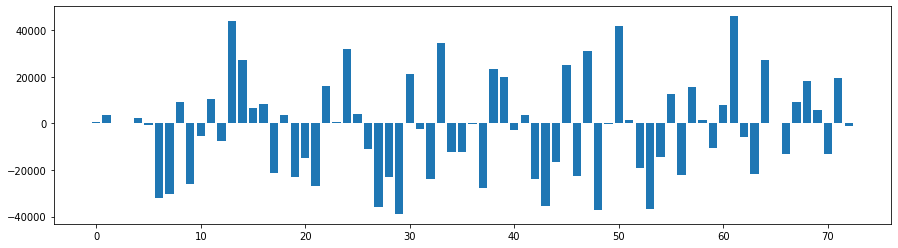

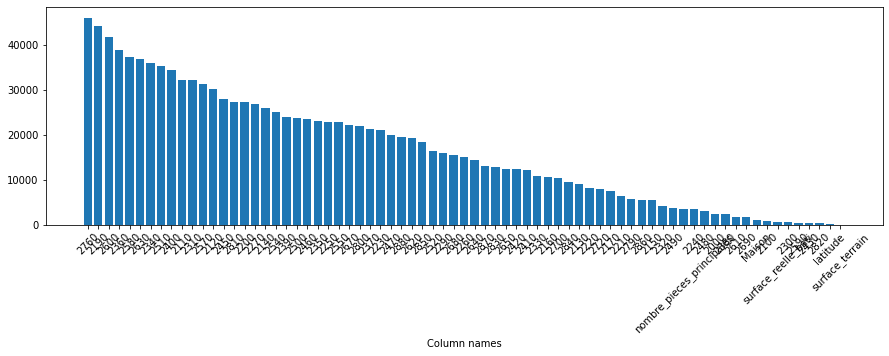

Lasso() R2 score is: 0.328)
Lasso() rmse score is: 1800921855.756)
Lasso() mape score is: 0.416
** **** **** **** **** **** **** **** **** **** **** **
Ridge() R2 score is: 0.328)
Ridge() rmse score is: 1800864506.854)
Ridge() mape score is: 0.413
** **** **** **** **** **** **** **** **** **** **** **
LinearRegression() R2 score is: 0.328)
LinearRegression() rmse score is: 1801059402.975)
LinearRegression() mape score is: 0.412
** **** **** **** **** **** **** **** **** **** **** **


In [184]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle', '2440', 'Appartement', 'longitude'
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]

result, sorted_VIF, columns_todrop = feature_selection(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = "LinearRegression")

apply_regression_model(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = models)

In [185]:
result

,columns,coef_(%)
0,2760,1.000000
1,2190,0.958285
2,2600,0.907814
3,2360,0.843723
4,2580,0.807564
...,...,...
68,2590,0.008830
69,2430,0.006788
70,2820,0.006719
71,latitude,0.003658


In [186]:
columns_todrop

['2590', '2430', '2820', 'latitude', 'surface_terrain']

In [187]:
sorted_VIF

,Features,VIF
3,latitude,85.231359
1,nombre_pieces_principales,21.494559
0,surface_reelle_bati,17.959254
72,Maison,11.758728
5,2100,11.619193
...,...,...
52,2620,1.161651
60,2720,1.146504
54,2640,1.143825
51,2610,1.107800


# New simulation "removing column code commune 2440 && 'Appartement' &&  'longitude', 'nbre_pieces_principales'

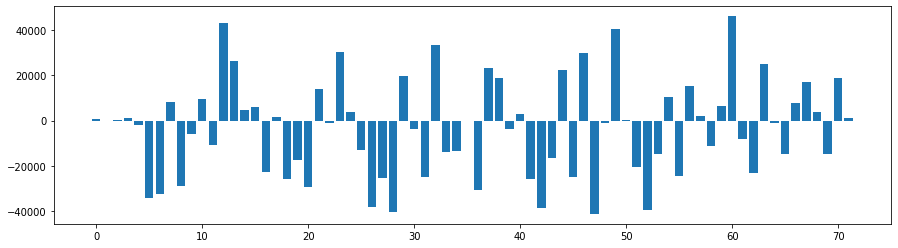

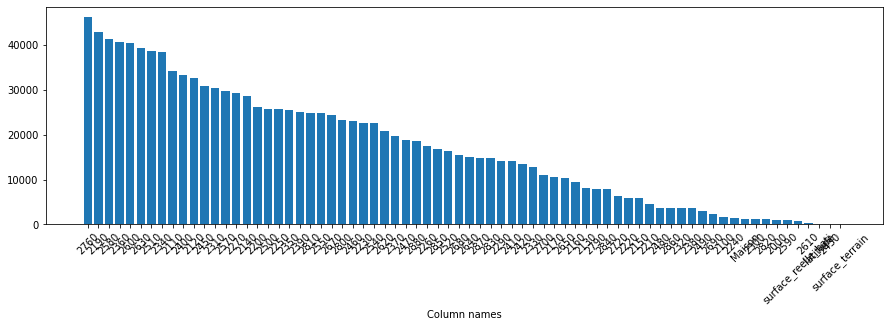

Lasso() R2 score is: 0.326)
Lasso() rmse score is: 1805190133.869)
Lasso() mape score is: 0.361
** **** **** **** **** **** **** **** **** **** **** **
Ridge() R2 score is: 0.326)
Ridge() rmse score is: 1805115943.082)
Ridge() mape score is: 0.361
** **** **** **** **** **** **** **** **** **** **** **
LinearRegression() R2 score is: 0.326)
LinearRegression() rmse score is: 1805301780.223)
LinearRegression() mape score is: 0.361
** **** **** **** **** **** **** **** **** **** **** **


In [188]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle', '2440', 'Appartement', 'longitude', 'nombre_pieces_principales'
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]

result, sorted_VIF, columns_todrop = feature_selection(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = "LinearRegression")

apply_regression_model(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = models)

In [189]:
result

,columns,coef_(%)
0,2760,1.000000
1,2190,0.931053
2,2580,0.893818
3,2360,0.879285
4,2600,0.874585
...,...,...
67,surface_reelle_bati,0.016302
68,2610,0.007030
69,latitude,0.003902
70,2430,0.002729


In [190]:
sorted_VIF

,Features,VIF
2,latitude,84.791565
4,2100,11.595540
71,Maison,11.181818
0,surface_reelle_bati,9.238064
13,2200,7.588270
...,...,...
51,2620,1.161555
59,2720,1.146383
53,2640,1.143357
50,2610,1.107711


In [191]:
columns_todrop

['surface_reelle_bati', '2610', 'latitude', '2430', 'surface_terrain']

# New simulation "removing column code commune 2440 && 'Appartement' &&  'longitude', 'nbre_pieces_principales', 'surface_terrain'

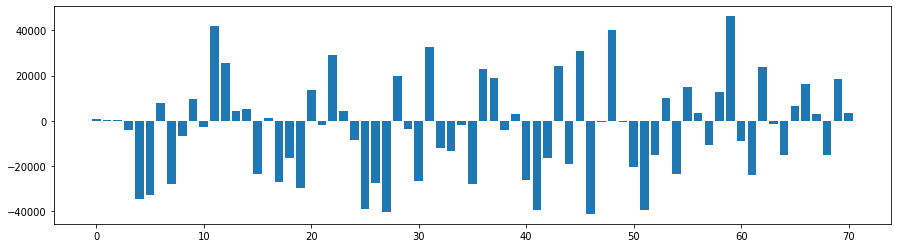

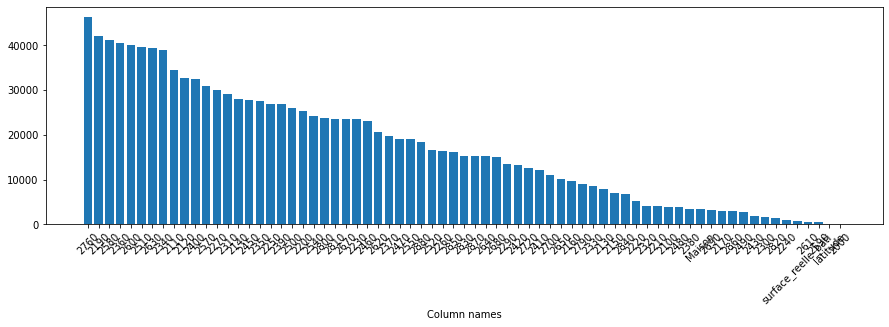

Lasso() R2 score is: 0.378)
Lasso() rmse score is: 1667505320.582)
Lasso() mape score is: 0.363
** **** **** **** **** **** **** **** **** **** **** **
Ridge() R2 score is: 0.378)
Ridge() rmse score is: 1667479700.23)
Ridge() mape score is: 0.363
** **** **** **** **** **** **** **** **** **** **** **
LinearRegression() R2 score is: 0.378)
LinearRegression() rmse score is: 1667525627.464)
LinearRegression() mape score is: 0.363
** **** **** **** **** **** **** **** **** **** **** **


In [192]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle', '2440', 
  'Appartement', 'longitude', 'nombre_pieces_principales', 'surface_terrain'
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]

result, sorted_VIF, columns_todrop = feature_selection(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = "LinearRegression")

apply_regression_model(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = models)

In [193]:
result

,columns,coef_(%)
0,2760,1.000000
1,2190,0.907762
2,2580,0.892075
3,2360,0.877107
4,2600,0.865013
...,...,...
66,surface_reelle_bati,0.016736
67,2610,0.012415
68,2590,0.011107
69,latitude,0.002770


In [194]:
sorted_VIF

,Features,VIF
1,latitude,84.720786
3,2100,11.594310
70,Maison,11.047904
0,surface_reelle_bati,9.106837
12,2200,7.586621
...,...,...
50,2620,1.161369
52,2640,1.143253
58,2720,1.142210
49,2610,1.107690


# New simulation "removing column code commune 2440 && 'Appartement' &&  'longitude', 'nbre_pieces_principales', 'surface_terrain', 'latitude'

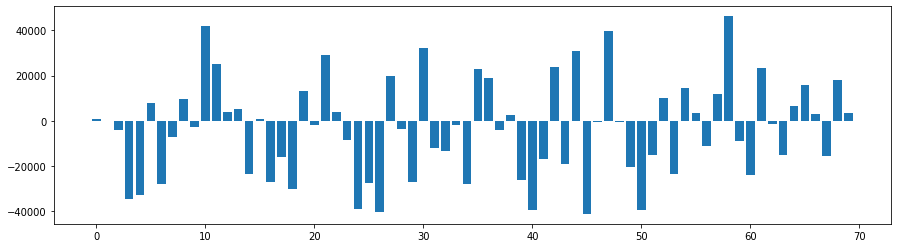

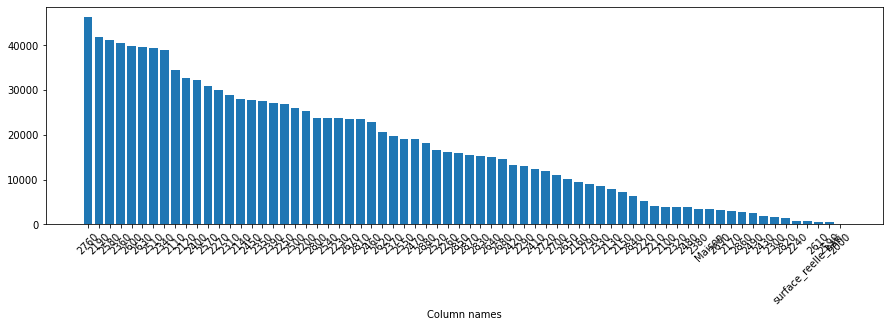

Lasso() R2 score is: 0.378)
Lasso() rmse score is: 1667882266.464)
Lasso() mape score is: 0.363
** **** **** **** **** **** **** **** **** **** **** **
Ridge() R2 score is: 0.378)
Ridge() rmse score is: 1667857386.971)
Ridge() mape score is: 0.363
** **** **** **** **** **** **** **** **** **** **** **
LinearRegression() R2 score is: 0.378)
LinearRegression() rmse score is: 1667903040.131)
LinearRegression() mape score is: 0.364
** **** **** **** **** **** **** **** **** **** **** **


In [195]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle', 
    '2440', 
  'Appartement', 'longitude', 'nombre_pieces_principales', 'surface_terrain', 'latitude'
  ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]

result, sorted_VIF, columns_todrop = feature_selection(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = "LinearRegression")

apply_regression_model(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = models)

In [197]:
result

,columns,coef_(%)
0,2760,1.000000
1,2190,0.906662
2,2580,0.891388
3,2360,0.876876
4,2600,0.863541
...,...,...
65,2240,0.018641
66,surface_reelle_bati,0.016734
67,2610,0.012405
68,2590,0.010922


In [198]:
sorted_VIF

,Features,VIF
69,Maison,10.908709
0,surface_reelle_bati,9.032067
2,2100,2.192645
20,2300,1.702980
11,2200,1.676692
...,...,...
49,2620,1.025787
51,2640,1.024510
48,2610,1.018771
57,2720,1.018762


# New simulation "removing c# New simulation "removing column code commune 2440 && 'Appartement' &&  'longitude', 'nbre_pieces_principales', 'surface_terrain', 'latitude'olumn code commune 2440 && 'Appartement' &&  'longitude', 'nbre_pieces_principales', 'surface_reelle_bati'

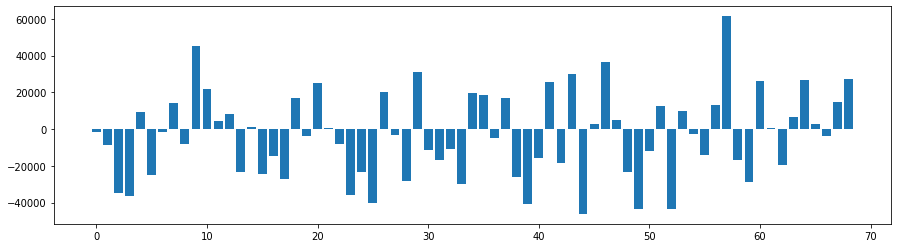

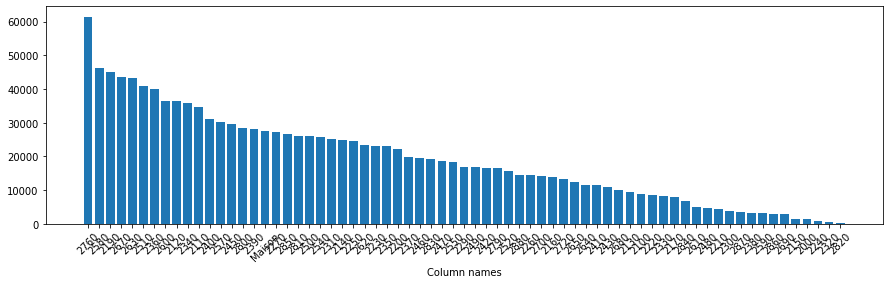

Lasso() R2 score is: 0.163)
Lasso() rmse score is: 2243840027.586)
Lasso() mape score is: 0.392
** **** **** **** **** **** **** **** **** **** **** **
Ridge() R2 score is: 0.163)
Ridge() rmse score is: 2243791025.16)
Ridge() mape score is: 0.392
** **** **** **** **** **** **** **** **** **** **** **
LinearRegression() R2 score is: 0.163)
LinearRegression() rmse score is: 2243864201.468)
LinearRegression() mape score is: 0.392
** **** **** **** **** **** **** **** **** **** **** **


In [199]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle', 
    '2440', 
  'Appartement', 'longitude', 'nombre_pieces_principales', 'surface_terrain', 'latitude',
                  'surface_reelle_bati'
  ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]

result, sorted_VIF, columns_todrop = feature_selection(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = "LinearRegression")

apply_regression_model(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = models)

**Since R2 score decreases, we keep 'surface_reelle_bati'**

**Now, we evaluate R2 score adding a new column : 'code_commune'**

In [206]:
df_new['code_commune'].value_counts()

2691    547
2722    223
2408    208
2168    154
2173    119
       ... 
2118      1
2012      1
2410      1
2695      1
2538      1
Name: code_commune, Length: 672, dtype: int64

# Encoding code_commune

In [213]:
#Change code_postal to str df2['code_postal'].dtype
df2['code_commune'] = df2['code_commune'].astype(str)

In [214]:
data_t4 = encoding_categ_column(df = data_t3, col_name = 'code_commune')
data_t4.shape

(4974, 756)

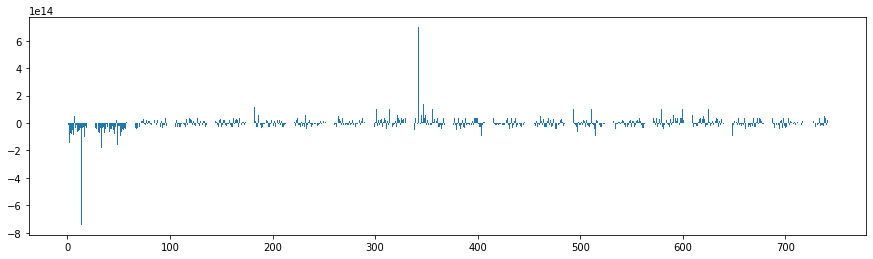

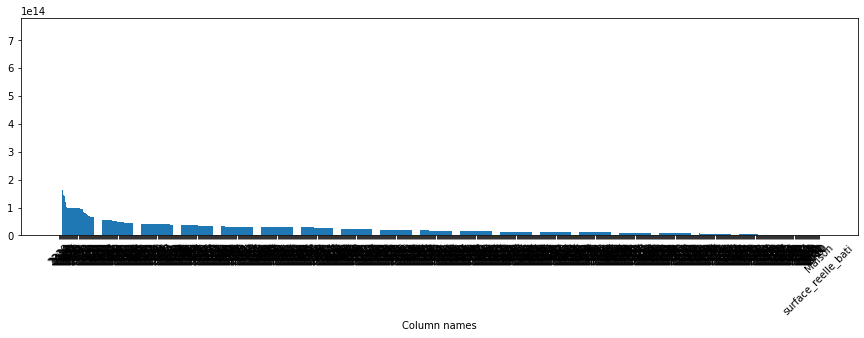

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


LinAlgError: SVD did not converge

In [215]:
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune',  
 'code_departement',
 'id_parcelle', 
    '2440', 
  'Appartement', 'longitude', 'nombre_pieces_principales', 'surface_terrain', 'latitude',
                 
  ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]

result, sorted_VIF, columns_todrop = feature_selection(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = "LinearRegression")

apply_regression_model(df = data_v2, col_list = cols_removd_target,
                         target_var = "valeur_fonciere", model = models)

# Investigate columns "code_postal" and "code_commune"

In [222]:
L1 = list(df2['code_commune'])
L2 = list(df2['code_postal'])
len(L1), len(L2)

(4974, 4974)

In [223]:
L1[:5]

['2173', '2541', '2165', '2304', '2676']

In [224]:
L2[:5]

['2300', '2190', '2800', '2800', '2820']

In [228]:
df2[df2['code_postal'] == '2300']

,id_mutation,date_mutation,valeur_fonciere,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
735,2016-12813,2016-01-05,91500,PL DU BROUAGE,0200,2300,2173,Chauny,2,02173000AK0183,Appartement,50,2,322,3.214219,49.614380
751,2016-12825,2016-01-12,85000,RUE PASTEUR,1110,2300,2173,Chauny,2,02173000AN0119,Maison,39,1,361,3.220420,49.617520
753,2016-12828,2016-01-04,170000,RUE JEAN BAPTISTE HUBERT,0725,2300,2173,Chauny,2,02173000ZD0175,Maison,98,4,190,3.226214,49.627322
756,2016-12831,2016-01-04,25000,RUE EMILE DUPLOYE,0060,2300,2719,Sinceny,2,02719000ZN0010,Maison,71,3,80,3.237003,49.594083
769,2016-12844,2016-01-16,90000,RUE ANATOLE CANNOT,0004,2300,2671,Saint-Aubin,2,02671000AB0249,Maison,94,5,297,3.185648,49.508966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,2016-15355,2016-12-19,78000,ALL DES LILAS,0880,2300,2173,Chauny,2,02173000AP0116,Maison,85,5,664,3.222641,49.621785
628,2016-15357,2016-12-28,34000,RUE DU BAILLY,0120,2300,2173,Chauny,2,02173000AW0242,Maison,28,2,105,3.211777,49.610499
643,2016-15377,2016-12-29,102000,RUE JEAN JACQUES ROUSSEAU,0300,2300,2820,Viry-Noureuil,2,02820000AK0142,Maison,94,4,1061,3.244941,49.642058
647,2016-15393,2016-12-30,79700,RUE DE LA LIBERTE,0360,2300,2820,Viry-Noureuil,2,02820000AB0062,Maison,86,4,238,3.250438,49.627001


In [229]:
df = get_data("""select * from data_working_update LIMIT 50000""", 1000)
data = df.copy()
data = drop_duplicates(df=data, col_name = 'id_mutation')
data.shape

Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got datafram

(40717, 17)

In [230]:
df2 = data.copy()

In [232]:
df2.head(20)

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,2016-1,2016-01-08,Vente,40000,RUE TONY REVILLON,0560,1750,1370,Saint-Laurent-sur-Saône,1,013700000A0253,Appartement,50,2,0,4.840606,46.304486
1,2016-4,2016-01-08,Vente,90000,PELUS,B203,1560,1364,Saint-Jean-sur-Reyssouze,1,013640000D0922,Maison,150,6,1220,5.059020,46.386697
2,2016-6,2016-01-04,Vente,203700,AU BOURG,B014,1190,1050,Boissey,1,010500000A1081,Maison,98,4,500,4.996678,46.383446
4,2016-7,2016-01-09,Vente,147000,RUE DE LA VILLE,0031,1340,1024,Attignat,1,01024000AB0111,Maison,70,2,464,5.161898,46.290693
5,2016-8,2016-01-12,Vente,95000,RTE DU PETIT MONTATIN,0295,1340,1130,Bresse Vallons,1,011300000C1146,Maison,91,2,921,5.156324,46.309770
6,2016-9,2016-01-15,Vente,273150,LOT PRES MICHEL,A014,1340,1163,Foissiat,1,01163000WH0880,Maison,113,4,1125,5.181398,46.370973
7,2016-10,2016-01-15,Vente,75000,LA VILLE,B135,1370,1241,Meillonnas,1,012410000F0121,Maison,120,3,50,5.351734,46.244752
8,2016-13,2016-01-11,Vente,238500,CHEM DE LA FONTAINE,0225,1160,1273,Neuville-sur-Ain,1,012730000E1933,Maison,126,4,1003,5.369280,46.064101
9,2016-21,2016-01-12,Vente,240000,LE BOURG,B002,1540,1291,Perrex,1,012910000A0628,Maison,126,5,1912,4.979027,46.245895
10,2016-22,2016-01-12,Vente,138000,RTE DE TERNANT,0440,1570,1159,Feillens,1,01159000AK0447,Maison,103,4,148,4.894313,46.328233


In [234]:
df2[df2['code_postal'] == 2300]

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
735,2016-12813,2016-01-05,Vente,91500,PL DU BROUAGE,0200,2300,2173,Chauny,2,02173000AK0183,Appartement,50,2,322,3.214219,49.614380
751,2016-12825,2016-01-12,Vente,85000,RUE PASTEUR,1110,2300,2173,Chauny,2,02173000AN0119,Maison,39,1,361,3.220420,49.617520
753,2016-12828,2016-01-04,Vente,170000,RUE JEAN BAPTISTE HUBERT,0725,2300,2173,Chauny,2,02173000ZD0175,Maison,98,4,190,3.226214,49.627322
755,2016-12830,2016-01-16,Vente,254500,RUE DU TOUR DE VILLE,0103,2300,2145,Caumont,2,02145000AD0016,Maison,173,6,1747,3.173005,49.632167
756,2016-12831,2016-01-04,Vente,25000,RUE EMILE DUPLOYE,0060,2300,2719,Sinceny,2,02719000ZN0010,Maison,71,3,80,3.237003,49.594083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,2016-15355,2016-12-19,Vente,78000,ALL DES LILAS,0880,2300,2173,Chauny,2,02173000AP0116,Maison,85,5,664,3.222641,49.621785
628,2016-15357,2016-12-28,Vente,34000,RUE DU BAILLY,0120,2300,2173,Chauny,2,02173000AW0242,Maison,28,2,105,3.211777,49.610499
643,2016-15377,2016-12-29,Vente,102000,RUE JEAN JACQUES ROUSSEAU,0300,2300,2820,Viry-Noureuil,2,02820000AK0142,Maison,94,4,1061,3.244941,49.642058
647,2016-15393,2016-12-30,Vente,79700,RUE DE LA LIBERTE,0360,2300,2820,Viry-Noureuil,2,02820000AB0062,Maison,86,4,238,3.250438,49.627001


**There are different 'code_commune' for the same 'code_commune' !!**